##`linear trans. of a non square matrix`

In [1]:
import numpy as np
import plotly.graph_objects as go

# Define the 8 vertices of a cube in 3D space
cube = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Create a list of edges to build the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),  # edges on the bottom face
         (4, 5), (5, 6), (6, 7), (7, 4),  # edges on the top face
         (0, 4), (1, 5), (2, 6), (3, 7)]  # edges on the sides

# Define a 2x3 transformation matrix
A = np.array([[1, 2, 1], [2, 1, 0]])

# Apply the transformation
transformed_cube = np.dot(A, cube.T).T

# Create a 3D plot for the original cube
fig1 = go.Figure()

for edge in edges:
    x0, y0, z0 = cube[edge[0]]
    x1, y1, z1 = cube[edge[1]]
    fig1.add_trace(go.Scatter3d(x=[x0, x1], y=[y0, y1], z=[z0, z1], mode='lines'))

fig1.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                   width=700, margin=dict(r=20, l=10, b=10, t=10))

fig1.show()

# Create a 2D plot for the transformed cube
fig2 = go.Figure()

for edge in edges:
    x0, y0 = transformed_cube[edge[0]]
    x1, y1 = transformed_cube[edge[1]]
    fig2.add_trace(go.Scatter(x=[x0, x1], y=[y0, y1], mode='lines'))

fig2.update_layout(xaxis_title='X', yaxis_title='Y',
                   width=700, margin=dict(r=20, l=10, b=10, t=10))

fig2.show()


In [2]:
import numpy as np
from scipy.linalg import eigh

# Define matrix A
A = np.array([[1, 2], [3, 4]])

# Calculate A^T A and A A^T
ATA = A.T @ A
AAT = A @ A.T

# Eigen decomposition of A^T A
eigvals_ATA, eigvecs_ATA = eigh(ATA)

# Eigen decomposition of A A^T
eigvals_AAT, eigvecs_AAT = eigh(AAT)

# Display results
print("Eigenvalues of A^T A:")
print(eigvals_ATA)

print("\nEigenvalues of A A^T:")
print(eigvals_AAT)

Eigenvalues of A^T A:
[ 0.13393125 29.86606875]

Eigenvalues of A A^T:
[ 0.13393125 29.86606875]


## `eigen decom. in pca vs svd in pca`

In [4]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Data matrix X
X.shape

(150, 4)

In [8]:
m,n=X.shape

In [6]:
## mean center the data
X_centered=X-np.mean(X,axis=0)

In [9]:
## covariance matrix
c=np.dot(X_centered.T,X_centered)/(m-1 )
c

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [28]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(c)
eigen_values=eigenvalues[::-1]
eigen_vector=eigenvectors[:,::-1]

In [29]:
k = 2
X_trans= eigenvectors[:, :k]

In [31]:
X_trans.shape

(4, 2)

In [10]:
u,s,V_t=np.linalg.svd(X_centered)

In [11]:
u

array([[-1.06937444e-01, -5.31164840e-02,  8.17734010e-03, ...,
         5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
       [-1.08133305e-01,  2.94357038e-02,  6.16531816e-02, ...,
         5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
       [-1.15099407e-01,  2.41054172e-02, -5.24368218e-03, ...,
         2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
       ...,
       [ 7.02927688e-02, -1.31144057e-02, -3.82231512e-02, ...,
         9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
       [ 7.57348450e-02, -1.93954931e-02, -2.11868549e-01, ...,
        -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
       [ 5.53860977e-02,  4.70071528e-02, -1.06310369e-01, ...,
        -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]])

In [12]:
s

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [13]:
V_t

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [15]:
V=V_t.T
V

array([[ 0.36138659, -0.65658877,  0.58202985,  0.31548719],
       [-0.08452251, -0.73016143, -0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266, -0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102, -0.54583143,  0.75365743]])

In [18]:
X_transform=np.dot(X_centered,V[:,0:2])
X_transform[:10]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425]])

In [21]:
y= iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

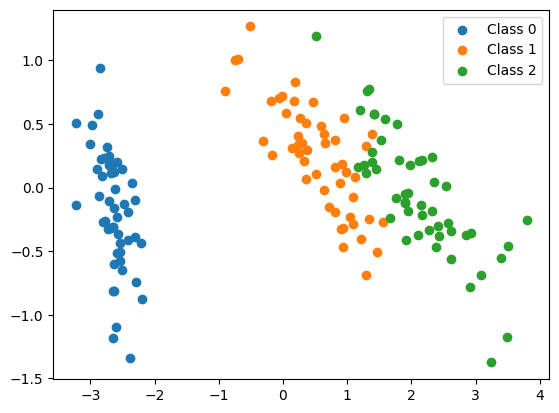

In [26]:
for i, label in enumerate(np.unique(iris.target)):
    plt.scatter(X_transform[iris.target == label, 0],
                X_transform[iris.target == label, 1],
                label=f'Class {label}')
plt.legend()
